In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import seaborn as sns

# Import API key
from api_keys import key
#import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [18]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

In [19]:
# OpenWeatherMap API Key
api_key = api_keys.key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

params = { "appid" :key,"units":"imperial" }

In [20]:
# Create the Dataframe
LatLon = pd.DataFrame({"Latitude":lats,"Longitude":lngs})        
LatLon.head()

LatLon["Closest City name"] = ""
LatLon["Closest Country code"] = ""
for index,row in LatLon.iterrows():
    city = citipy.nearest_city(row["Latitude"],row["Longitude"])
    LatLon.set_value(index,"Closest City name",city.city_name)
    LatLon.set_value(index,"Closest Country code",city.country_code.upper())

# Get rid of the Duplicates
ULatLon = LatLon.dropna()
ULatLon = ULatLon.drop_duplicates()

# Picking a sample of 700 cities to proceed with analysis
SampCities = ULatLon.sample(700)
SampCities = SampCities.reset_index()
#SampCities = SampCities.iloc[:,[3,4]]
SampCities.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.


,index,Latitude,Longitude,Closest City name,Closest Country code
0,1448,-21.070944,74.037421,grand river south east,MU
1,778,-11.310436,-6.676712,jamestown,SH
2,362,-53.516294,-57.986102,ushuaia,AR
3,998,-39.869569,53.157016,taolanaro,MG
4,922,-50.509279,-21.643000,arraial do cabo,BR


In [ ]:
# loop throught the Cities and append them to a dataframe
for index,row in SampCities.iterrows():
    params["q"] =f'{row["Closest City name"]},{row["Closest Country code"]}'
    print(f"Processing Record {index+1} of {len(SampCities)} | for City,Country: {params['q']}")
    CWResp = requests.get(url,params)
    print(CWResp.url)
    CWRespJson = CWResp.json()

Processing Record 1 of 700 | for City,Country: grand river south east,MU
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=grand+river+south+east%2CMU
Processing Record 2 of 700 | for City,Country: jamestown,SH
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=jamestown%2CSH
Processing Record 3 of 700 | for City,Country: ushuaia,AR
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=ushuaia%2CAR
Processing Record 4 of 700 | for City,Country: taolanaro,MG
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=taolanaro%2CMG
Processing Record 5 of 700 | for City,Country: arr

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=bluff%2CNZ
Processing Record 39 of 700 | for City,Country: ushuaia,AR
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=ushuaia%2CAR
Processing Record 40 of 700 | for City,Country: albany,AU
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=albany%2CAU
Processing Record 41 of 700 | for City,Country: tuktoyaktuk,CA
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=tuktoyaktuk%2CCA
Processing Record 42 of 700 | for City,Country: ionia,US
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426a

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=mataura%2CPF
Processing Record 76 of 700 | for City,Country: ushuaia,AR
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=ushuaia%2CAR
Processing Record 77 of 700 | for City,Country: bundaberg,AU
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=bundaberg%2CAU
Processing Record 78 of 700 | for City,Country: castro,CL
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=castro%2CCL
Processing Record 79 of 700 | for City,Country: kirakira,SB
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=mallama%2CCO
Processing Record 113 of 700 | for City,Country: jamestown,SH
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=jamestown%2CSH
Processing Record 114 of 700 | for City,Country: ucluelet,CA
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=ucluelet%2CCA
Processing Record 115 of 700 | for City,Country: san policarpo,PH
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd632149b1426afea5cc723130ee34d1&appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=san+policarpo%2CPH
Processing Record 116 of 700 | for City,Country: kyra,RU
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APP

In [10]:
# Perform a weather check on each of the cities using a series of successive API calls.
# Include a print log of each city as it's being processed with the city number, city name, and requested URL.

# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
params = { "appid" :key,"units":"imperial" }

print("-----------------------------------------")
print("Beginning Data Retrieval")
print("-----------------------------------------\n")

# loop throught the Cities and append them to a dataframe
for index,row in SampCities.iterrows():
    params["q"] =f'{row["Closest City name"]},{row["Closest Country code"]}'
    print(f"Processing Record {index+1} of {len(SampCities)} | for City,Country: {params['q']}")
    CWResp = requests.get(url,params)
    print(CWResp.url)
    CWRespJson = CWResp.json()
    
    SampCities.set_value(index,"Latitude",CWRespJson.get("coord",{}).get("lat"))
    SampCities.set_value(index,"Longitude",CWRespJson.get("coord",{}).get("lon"))
    SampCities.set_value(index,"Temperature",CWRespJson.get("coord",{}).get("lon"))
    SampCities.set_value(index,"Max Temp",CWRespJson.get("main",{}).get("temp_max"))
    SampCities.set_value(index,"Wind speed",CWRespJson.get("wind",{}).get("speed"))
    SampCities.set_value(index,"Humidity",CWRespJson.get("main",{}).get("humidity"))
    SampCities.set_value(index,"Cloudiness",CWRespJson.get("clouds",{}).get("all"))
    SampCities.set_value(index,"Date",CWRespJson.get("dt"))

print("-----------------------------------------")
print("Data Retrieval Complete")
print("-----------------------------------------")

-----------------------------------------
Beginning Data Retrieval
-----------------------------------------

Processing Record 1 of 700 | for City,Country: ushuaia,AR
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=ushuaia%2CAR


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel_l

Processing Record 2 of 700 | for City,Country: saleaula,WS
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=saleaula%2CWS
Processing Record 3 of 700 | for City,Country: albany,AU
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=albany%2CAU
Processing Record 4 of 700 | for City,Country: chuy,UY
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=chuy%2CUY
Processing Record 5 of 700 | for City,Country: provideniya,RU
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=provideniya%2CRU
Processing Record 6 of 700 | for City,Country: shimoda,JP
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=shimoda%2CJP
Processing Record 7 of 700 | for City,Country: esperance,AU
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426af

http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=griffith%2CAU
Processing Record 50 of 700 | for City,Country: belaya gora,RU
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=belaya+gora%2CRU
Processing Record 51 of 700 | for City,Country: srednekolymsk,RU
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=srednekolymsk%2CRU
Processing Record 52 of 700 | for City,Country: istok,RU
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=istok%2CRU
Processing Record 53 of 700 | for City,Country: salalah,OM
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=salalah%2COM
Processing Record 54 of 700 | for City,Country: chaozhou,CN
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=chao

http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=honningsvag%2CNO
Processing Record 99 of 700 | for City,Country: vanavara,RU
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=vanavara%2CRU
Processing Record 100 of 700 | for City,Country: lebu,CL
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=lebu%2CCL
Processing Record 101 of 700 | for City,Country: sitka,US
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=sitka%2CUS
Processing Record 102 of 700 | for City,Country: amga,RU
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=amga%2CRU
Processing Record 103 of 700 | for City,Country: makakilo city,US
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=makakilo+city%2CUS
Pro

http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=sitka%2CUS
Processing Record 146 of 700 | for City,Country: karakendzha,TJ
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=karakendzha%2CTJ
Processing Record 147 of 700 | for City,Country: butaritari,KI
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=butaritari%2CKI
Processing Record 148 of 700 | for City,Country: new norfolk,AU
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=new+norfolk%2CAU
Processing Record 149 of 700 | for City,Country: ponta do sol,CV
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=ponta+do+sol%2CCV
Processing Record 150 of 700 | for City,Country: barentsburg,SJ
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&

http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=taolanaro%2CMG
Processing Record 194 of 700 | for City,Country: dangriga,BZ
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=dangriga%2CBZ
Processing Record 195 of 700 | for City,Country: rikitea,PF
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=rikitea%2CPF
Processing Record 196 of 700 | for City,Country: san cristobal,EC
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=san+cristobal%2CEC
Processing Record 197 of 700 | for City,Country: cape town,ZA
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=cape+town%2CZA
Processing Record 198 of 700 | for City,Country: tilichiki,RU
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperi

http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=namibe%2CAO
Processing Record 240 of 700 | for City,Country: georgetown,SH
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=georgetown%2CSH
Processing Record 241 of 700 | for City,Country: merauke,ID
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=merauke%2CID
Processing Record 242 of 700 | for City,Country: beira,MZ
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=beira%2CMZ
Processing Record 243 of 700 | for City,Country: amroha,IN
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=amroha%2CIN
Processing Record 244 of 700 | for City,Country: kaitangata,NZ
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=kaitangata%2CNZ

http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=te+anau%2CNZ
Processing Record 287 of 700 | for City,Country: paamiut,GL
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=paamiut%2CGL
Processing Record 288 of 700 | for City,Country: yellowknife,CA
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=yellowknife%2CCA
Processing Record 289 of 700 | for City,Country: pavullo nel frignano,IT
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=pavullo+nel+frignano%2CIT
Processing Record 290 of 700 | for City,Country: bull savanna,JM
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=bull+savanna%2CJM
Processing Record 291 of 700 | for City,Country: jutai,BR
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc72313

http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=east+london%2CZA
Processing Record 334 of 700 | for City,Country: beringovskiy,RU
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=beringovskiy%2CRU
Processing Record 335 of 700 | for City,Country: avarua,CK
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=avarua%2CCK
Processing Record 336 of 700 | for City,Country: okha,RU
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=okha%2CRU
Processing Record 337 of 700 | for City,Country: hithadhoo,MV
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=hithadhoo%2CMV
Processing Record 338 of 700 | for City,Country: ushuaia,AR
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=ushuaia

http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=gueret%2CFR
Processing Record 382 of 700 | for City,Country: busselton,AU
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=busselton%2CAU
Processing Record 383 of 700 | for City,Country: coquimbo,CL
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=coquimbo%2CCL
Processing Record 384 of 700 | for City,Country: ushuaia,AR
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=ushuaia%2CAR
Processing Record 385 of 700 | for City,Country: mataura,PF
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=mataura%2CPF
Processing Record 386 of 700 | for City,Country: rikitea,PF
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=rikitea%2CPF

http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=mataura%2CPF
Processing Record 428 of 700 | for City,Country: ushuaia,AR
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=ushuaia%2CAR
Processing Record 429 of 700 | for City,Country: goderich,SL
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=goderich%2CSL
Processing Record 430 of 700 | for City,Country: ushuaia,AR
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=ushuaia%2CAR
Processing Record 431 of 700 | for City,Country: nikolskoye,RU
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=nikolskoye%2CRU
Processing Record 432 of 700 | for City,Country: busselton,AU
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=busselt

http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=yulara%2CAU
Processing Record 475 of 700 | for City,Country: bluff,NZ
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=bluff%2CNZ
Processing Record 476 of 700 | for City,Country: padang,ID
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=padang%2CID
Processing Record 477 of 700 | for City,Country: batagay-alyta,RU
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=batagay-alyta%2CRU
Processing Record 478 of 700 | for City,Country: hithadhoo,MV
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=hithadhoo%2CMV
Processing Record 479 of 700 | for City,Country: charlestown,KN
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=char

http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=tuatapere%2CNZ
Processing Record 521 of 700 | for City,Country: hobart,AU
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=hobart%2CAU
Processing Record 522 of 700 | for City,Country: tumannyy,RU
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=tumannyy%2CRU
Processing Record 523 of 700 | for City,Country: hilo,US
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=hilo%2CUS
Processing Record 524 of 700 | for City,Country: arcachon,FR
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=arcachon%2CFR
Processing Record 525 of 700 | for City,Country: souillac,MU
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=souillac%2CMU
Proc

http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=san+quintin%2CMX
Processing Record 568 of 700 | for City,Country: khatanga,RU
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=khatanga%2CRU
Processing Record 569 of 700 | for City,Country: cherskiy,RU
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=cherskiy%2CRU
Processing Record 570 of 700 | for City,Country: kruisfontein,ZA
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=kruisfontein%2CZA
Processing Record 571 of 700 | for City,Country: kukmor,RU
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=kukmor%2CRU
Processing Record 572 of 700 | for City,Country: ushuaia,AR
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=u

http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=barentsburg%2CSJ
Processing Record 614 of 700 | for City,Country: otradnoye,RU
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=otradnoye%2CRU
Processing Record 615 of 700 | for City,Country: usatove,UA
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=usatove%2CUA
Processing Record 616 of 700 | for City,Country: bethel,US
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=bethel%2CUS
Processing Record 617 of 700 | for City,Country: jamestown,SH
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=jamestown%2CSH
Processing Record 618 of 700 | for City,Country: chuy,UY
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=chuy%2CUY


http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=eyemouth%2CGB
Processing Record 660 of 700 | for City,Country: mataura,PF
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=mataura%2CPF
Processing Record 661 of 700 | for City,Country: jamestown,SH
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=jamestown%2CSH
Processing Record 662 of 700 | for City,Country: yellowknife,CA
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=yellowknife%2CCA
Processing Record 663 of 700 | for City,Country: vaini,TO
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=vaini%2CTO
Processing Record 664 of 700 | for City,Country: chuy,UY
http://api.openweathermap.org/data/2.5/weather?appid=dd632149b1426afea5cc723130ee34d1&units=imperial&q=chuy%2CUY
P

In [11]:
# Drop cities without infos
SampCities = SampCities.dropna()
CityWeather = pd.DataFrame({"City":SampCities["Closest City name"],
                         "Cloudiness":SampCities["Cloudiness"],
                         "Country":SampCities["Closest Country code"],
                         "Date":SampCities["Date"],
                         "Humidity":SampCities["Humidity"],
                         "Lat":SampCities["Latitude"],
                         "Lng":SampCities["Longitude"],
                         "Max Temp":SampCities["Max Temp"],
                         "Wind Speed":SampCities["Wind speed"],})

# Save CSV of all data retrieved 
CityWeather.to_csv("Sample_City_Weather_data.csv")

# Count Weather data
CityWeather.count()

City          0
Cloudiness    0
Country       0
Date          0
Humidity      0
Lat           0
Lng           0
Max Temp      0
Wind Speed    0
dtype: int64

In [12]:
# Display the City Dataa Frame
CityWeather["Date"]=CityWeather["Date"].astype('int')
CityWeather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


ValueError: min() arg is an empty sequence

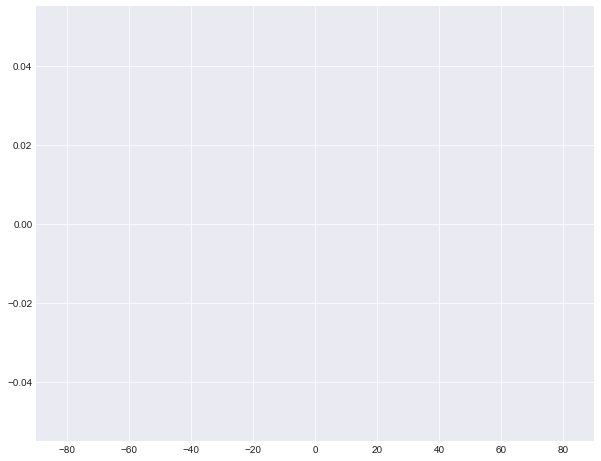

In [13]:
# Use the scatter functionUse the scatter function
# Draw Latitude vs Temperature ChartDraw Latitude vs Temperature 
sns.set_style("darkgrid") 
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(CityWeather['Lat'], CityWeather['Max Temp'], c='blue',alpha=.6, linewidth=1, edgecolor='black')
#Set x and y limits, title, labels
ax.set_xlim(-90, 90)
ax.set_ylim(min(CityWeather['Max Temp'])-20, max(CityWeather['Max Temp'])+20)
ax.set_xlabel("Latitude")
ax.set_ylabel("Max Temperature (F)")
ax.set_title("City Latitude vs. Max Temperature (06/20/18)")
# Save png images for each scatter plot.
plt.savefig("CityLat-MaxTemp-06.20.18.png")
plt.show()

ValueError: min() arg is an empty sequence

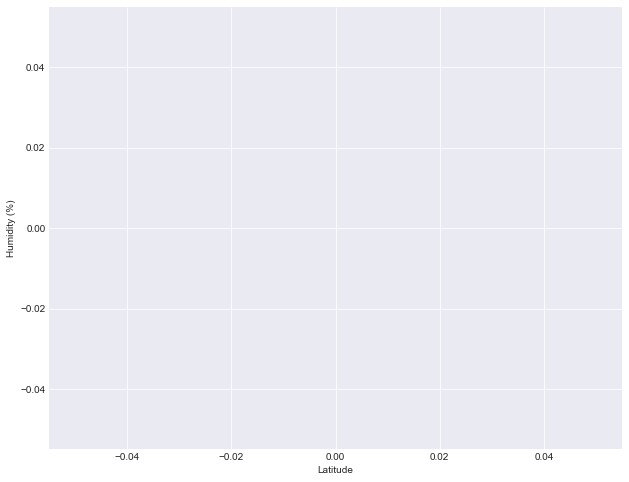

In [14]:
#Use the scatter function
#Draw Latitude vs Humidity Chart - diff method of drawing chart
sns.set_style("darkgrid") 
g = sns.lmplot(x="Lat", y='Humidity', data=CityWeather, size = 6.8,
           aspect=1.3,palette="blue", 
           scatter_kws={"alpha":.6,"linewidth":1, 
                        "edgecolor":'black',"marker":'o'}, fit_reg=False)
#Set x and y limits, title, labels
g = (g.set_axis_labels("Latitude","Humidity (%)")
     .set(xlim=(-90, 90), ylim=(min(CityWeather['Humidity'])-20, max(CityWeather['Humidity'])+20)))
plt.title("City Latitude vs. Humidity (06/20/2018)")
# Save png images for each scatter plot.
plt.savefig("CityLat-Humidity-06.20.18.png")
plt.show()

ValueError: min() arg is an empty sequence

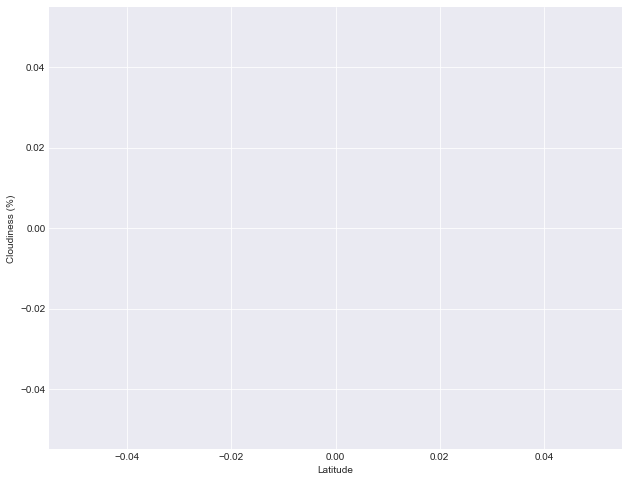

In [15]:
#Use the scatter function
#Draw Latitude vs Humidity Chart - diff method of drawing chart
sns.set_style("darkgrid") 
g = sns.lmplot(x="Lat", y='Cloudiness', data=CityWeather, size = 6.8,
           aspect=1.3,palette="blue", 
           scatter_kws={"alpha":.6,"linewidth":1, 
                        "edgecolor":'black',"marker":'o'}, fit_reg=False)
#Set x and y limits, title, labels
g = (g.set_axis_labels("Latitude","Cloudiness (%)")
     .set(xlim=(-90, 90), ylim=(min(CityWeather['Cloudiness'])-20, max(CityWeather['Cloudiness'])+20)))
plt.title("City Latitude vs. Cloudiness (06/20/2018)")
# Save png images for each scatter plot.
plt.savefig("CityLat-Cloudiness-06.20.18.png")
plt.show()

ValueError: min() arg is an empty sequence

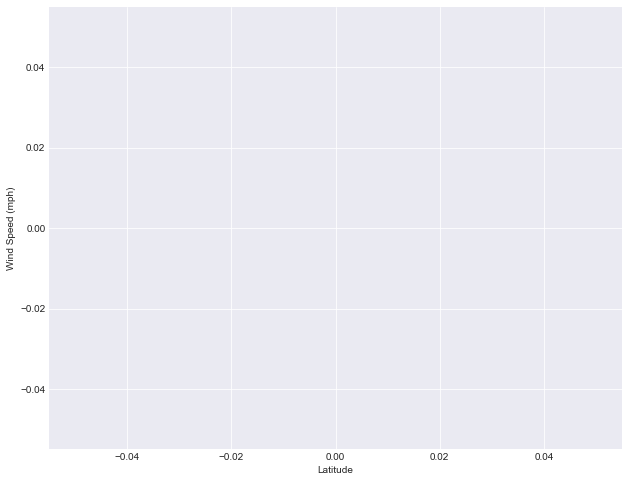

In [16]:
#Use the scatter function
#Draw Latitude vs Humidity Chart - diff method of drawing chart
sns.set_style("darkgrid") 
g = sns.lmplot(x="Lat", y='Wind Speed', data=CityWeather, size = 6.8,
           aspect=1.3,palette="blue", 
           scatter_kws={"alpha":.6,"linewidth":1, 
                        "edgecolor":'black',"marker":'o'}, fit_reg=False)
#Set x and y limits, title, labels
g = (g.set_axis_labels("Latitude","Wind Speed (mph)")
     .set(xlim=(-90, 90), ylim=(min(CityWeather['Wind Speed'])-20, max(CityWeather['Wind Speed'])+20)))
plt.title("City Latitude vs. Wind Speed (06/20/2018)")
# Save png images for each scatter plot.
plt.savefig("CityLat-WindSpeed-06.20.18.png")
plt.show()